# AML 3104 - Neural Networks & Deep Learning

- Abhijit Morye 	- ID C0825094
- Archies Desai     - ID C0827794
- Bruno Milhomem 	- ID C0796309
- Tashi Paljor 	    - ID C0825364

###  Project: Music Recommendation Based on Facial Expression.

The project is divided into 5 steps.

- Step 1.	Dataset Colection
- Step 2.	Exploratory Data Analysis (EDA)
- Step 3.   Preprocessing
- Step 4.   Create Model
- Step 5.	Test & Training

### Data Collection

In [1]:
# Importing the python packages

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import pandas as pd

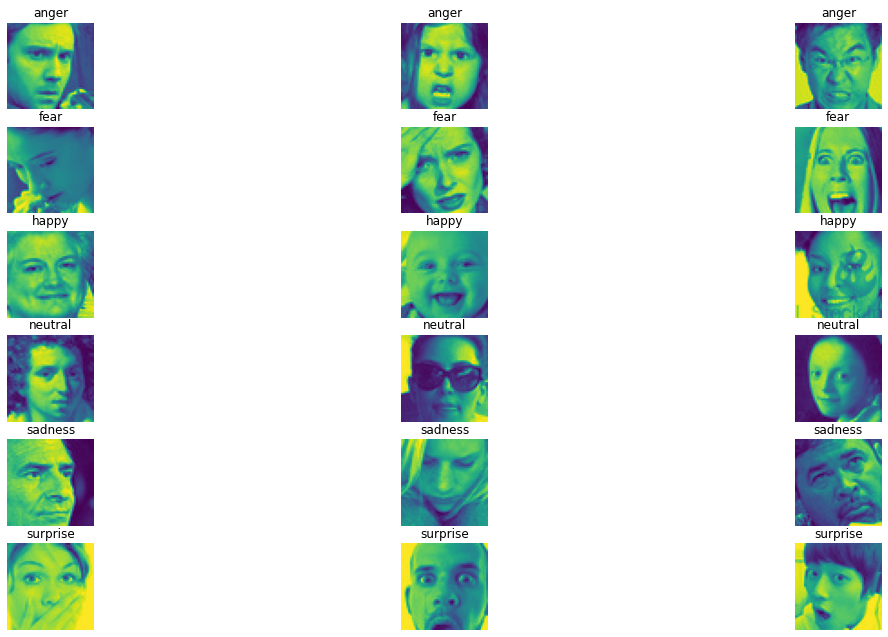

In [2]:
#main_folders = os.listdir(r'C:\Users\Bruno\OneDrive\Área de Trabalho\Lab')
main_folders = os.listdir('.\images')
#main_path = 'C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Lab'
main_path = os.getcwd() + '\images'
count = 1
plt.figure(figsize=(20, 15))
for folder in main_folders:
    for file in os.listdir(os.path.join(main_path+'\\'+folder))[:9:3]:
        sub_folder = os.path.join(main_path+'\\'+folder)
        img_path = mpimg.imread(os.path.join(sub_folder+'\\'+file))
        plt.subplot(8,3,count)
        plt.imshow(img_path)
        plt.title(folder)
        plt.axis('off')
        count += 1
plt.show()                                    

### Exploratory Data Analysis (EDA)

In [3]:
#print(f'Total Categories:', len(os.listdir('C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Lab')),'\n')
print(f'Total Categories:', len(os.listdir(main_path)))
for folder in main_folders:
    print(f'Category:', folder)
    print(f'Quantity:', len(os.listdir(os.path.join(main_path+'\\'+folder))))
    print('='*20)

Total Categories: 6
Category: anger
Quantity: 4128
Category: fear
Quantity: 4178
Category: happy
Quantity: 7371
Category: neutral
Quantity: 4982
Category: sadness
Quantity: 5022
Category: surprise
Quantity: 3454


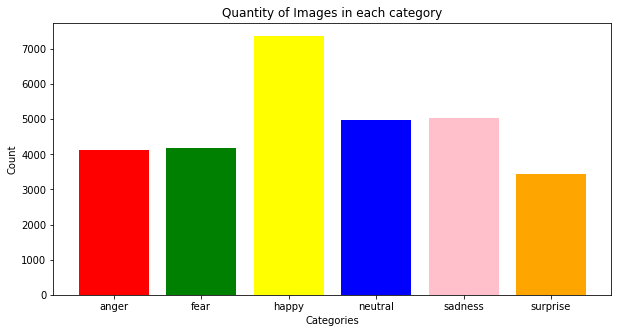

In [4]:
# print(os.listdir(main_path))
files_count = []
for folder in main_folders:
    files_count.append(len(os.listdir(os.path.join(main_path+"\\"+folder))))
# print(files_count)

plt.figure(figsize=(10, 5))
plt.bar(x=main_folders, height=files_count, color=['red', 'green', 'yellow', 'blue', 'pink', 'orange', 'purple'])
plt.title('Quantity of Images in each category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

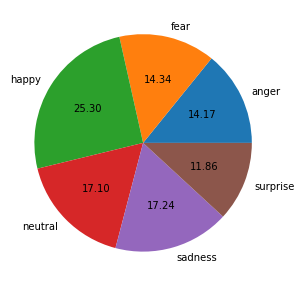

In [5]:
plt.figure(figsize=(10, 5))
plt.pie(files_count, labels=main_folders, autopct='%.2f')
# plt.legend()
plt.show()

### Preprocessing

In [6]:
import numpy as np

#main_folders = os.listdir(r'C:\Users\Bruno\OneDrive\Área de Trabalho\Lab')
main_folders = os.listdir(main_path)
#main_path = 'C:\\Users\\Bruno\\OneDrive\\Área de Trabalho\\Lab'
# main_path = r'C:\Users\bmilhome\Desktop\Lambton\Project\images'

X = []
y = []

for folder in main_folders:
    sub_folder = os.path.join(main_path+'\\'+folder)
    for file in os.listdir(sub_folder):
        img_path = mpimg.imread(os.path.join(sub_folder+'\\'+file))
        X.append(img_path/255.)
        y.append(folder)

In [7]:
y[:5]

['anger', 'anger', 'anger', 'anger', 'anger']

In [8]:
X[:5]

[array([[0.28235294, 0.30588235, 0.31764706, ..., 0.20392157, 0.16862745,
         0.15686275],
        [0.25490196, 0.24313725, 0.23137255, ..., 0.21568627, 0.20392157,
         0.17647059],
        [0.18431373, 0.16470588, 0.23529412, ..., 0.18431373, 0.21176471,
         0.19215686],
        ...,
        [0.35686275, 0.25490196, 0.18039216, ..., 0.29019608, 0.21176471,
         0.16862745],
        [0.29803922, 0.31372549, 0.29803922, ..., 0.42352941, 0.27058824,
         0.18039216],
        [0.30196078, 0.29019608, 0.31764706, ..., 0.41176471, 0.42352941,
         0.32156863]]),
 array([[0.59607843, 0.58431373, 0.57647059, ..., 0.50588235, 0.54509804,
         0.4745098 ],
        [0.58431373, 0.59607843, 0.58823529, ..., 0.4745098 , 0.57254902,
         0.52941176],
        [0.59607843, 0.59607843, 0.61568627, ..., 0.43921569, 0.4745098 ,
         0.56862745],
        ...,
        [0.73333333, 0.74117647, 0.47058824, ..., 0.72156863, 0.7254902 ,
         0.7372549 ],
        [0.7

In [9]:
myDict = {"anger":0,"fear":1,"happy":2,"sadness":3,"surprise":4,"neutral":5}
y = [myDict[i] for i in y]
y = np.array(y)

In [10]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
X = np.array(X)
X.shape
#df_X = pd.DataFrame(X.T)

(29135, 48, 48)

In [12]:
X[0].shape

(48, 48)

In [13]:
y.shape

(29135,)

In [14]:
y = y.reshape(-1,1)
y.shape

(29135, 1)

### Test & Training

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=10)

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [18]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

In [19]:
for i in range(6):
    print(f'count of category in {i} in test set : {np.count_nonzero(y_test == i)}')

count of category in 0 in test set : 1032
count of category in 1 in test set : 1044
count of category in 2 in test set : 1843
count of category in 3 in test set : 1256
count of category in 4 in test set : 863
count of category in 5 in test set : 1246


In [20]:
for i in range(6):
    print(f'count of category {i} in train set: {np.count_nonzero(y_train == i)}')

count of category 0 in train set: 3096
count of category 1 in train set: 3134
count of category 2 in train set: 5528
count of category 3 in train set: 3766
count of category 4 in train set: 2591
count of category 5 in train set: 3736


In [21]:
X_train.shape

(21851, 48, 48)

In [22]:
y_train.shape

(21851, 1)

### Create Model

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

In [24]:
model = Sequential([
    Conv2D(128,(5,5),input_shape=(48,48,1),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Dropout(0.2),
    Conv2D(256,(5,5),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Dropout(0.2),
    Conv2D(256,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Dropout(0.2),
    Conv2D(256,(3,3),activation='relu',padding='same'),
    # MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(6,activation='softmax')
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
547/547 [==============================] - 304s 555ms/step - loss: 1.7622 - accuracy: 0.2527 - val_loss: 1.7475 - val_accuracy: 0.2503
Epoch 2/20
547/547 [==============================] - 302s 552ms/step - loss: 1.7163 - accuracy: 0.2692 - val_loss: 1.6401 - val_accuracy: 0.3095
Epoch 3/20
547/547 [==============================] - 338s 617ms/step - loss: 1.5680 - accuracy: 0.3563 - val_loss: 1.4942 - val_accuracy: 0.3951
Epoch 4/20
547/547 [==============================] - 271s 495ms/step - loss: 1.4639 - accuracy: 0.4086 - val_loss: 1.4068 - val_accuracy: 0.4473
Epoch 5/20
547/547 [==============================] - 261s 477ms/step - loss: 1.3859 - accuracy: 0.4511 - val_loss: 1.3386 - val_accuracy: 0.4736
Epoch 6/20
547/547 [==============================] - 249s 456ms/step - loss: 1.3210 - accuracy: 0.4755 - val_loss: 1.3034 - val_accuracy: 0.4848
Epoch 7/20
547/547 [==============================] - 243s 444ms/step - loss: 1.2542 - accuracy: 0.5048 - val_loss: 1.2920 -

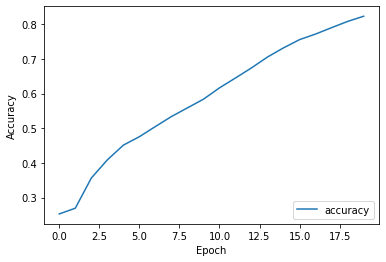

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

228/228 - 21s - loss: 2.0096 - accuracy: 0.5048 - 21s/epoch - 91ms/step


In [29]:
print(f'The accuracy is: {round(test_acc*100,2)}%')

The accuracy is: 50.48%


In [30]:
y_test = y_test.astype('int64')
y_test

array([[0],
       [3],
       [5],
       ...,
       [1],
       [5],
       [3]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
# y_pred = y_pred.reshape(len(y_pred),1)
print(y_pred.shape)
print(classification_report(y_test, y_pred))

228/228 [==============================] - 23s 90ms/step
(7284,)
              precision    recall  f1-score   support

           0       0.41      0.38      0.40      1032
           1       0.38      0.30      0.33      1044
           2       0.68      0.72      0.70      1843
           3       0.38      0.40      0.39      1256
           4       0.63      0.63      0.63       863
           5       0.44      0.48      0.46      1246

    accuracy                           0.50      7284
   macro avg       0.49      0.49      0.48      7284
weighted avg       0.50      0.50      0.50      7284



In [ ]:
model.save("music_recommendation_model.h5")